모델 선정 및 학습  
  
    : 데이터 수집 다음으로 중요한 것  
    : 상황에 따라 다른 모델을 구축해야 함  
    
데이터 나누기 - 훈련 / 검증 / 시험  
  
    : 모델을 선정하고 모델의 성능 평가나 학습률 향상을 위해 데이터를 훈련용 / 검증용/ 테스트용으로 나누는 것이 중요함  
    : 데이터를 나누는 또 하나의 이유는 과적합을 방지하기 위해
   
---

# 결정나무를 이용한 아이리스 품종 분류

## 1. 데이터 준비하고 정리하기

### 1) 데이터 불러오기

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

### 2) 데이터 간단히 정리하기

In [2]:
import pandas as pd

iris_pd = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3) 라벨 인코딩

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris.target_names)

iris_pd['species'] = le.inverse_transform(iris.target)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. PAIRPLOT으로 특징 추출

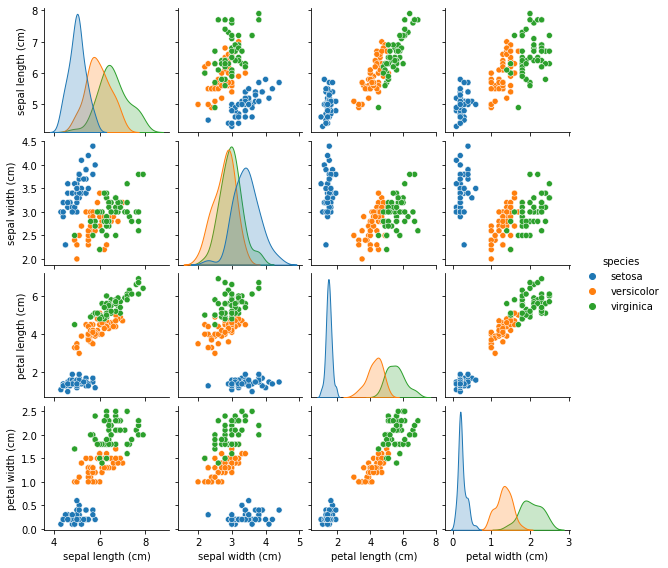

In [4]:
import seaborn as sns

sns.pairplot(iris_pd, hue='species', height=2)

## 3. 데이터 분리

### 1) 훈련용과 시험용으로 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split

feature_data = iris.data[:, 2:]

X_train, X_test, y_train, y_test = \
                        train_test_split(feature_data,
                                         iris.target,
                                         test_size = 0.2,
                                         random_state = 13)

### 2) class별로 동일 비율로 데이터가 분리되었는지 확인

In [6]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13]))

### 3)  동일 비율로 CLASS 데이터별로 분리하기

In [7]:
X_train, X_test, y_train, y_test = \
                        train_test_split(feature_data,
                                         iris.target,
                                         test_size = 0.2,
                                         random_state = 13,
                                         stratify = iris.target)

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

## 4. 모델 선정 및 학습

### 1) 결정나무 DECISION TREE 학습

In [8]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

### 2) 완성된 모델 확인

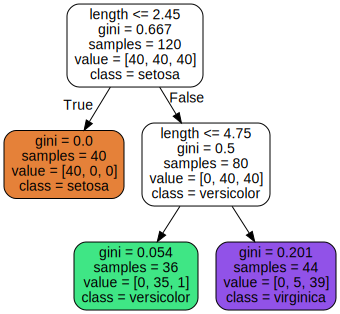

In [9]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(iris_tree, feature_names=['length', 'width'],
                      class_names=iris.target_names,
                      rounded=True, filled=True))

## 5. 모델 성능 확인

### 1) ACCURACY 확인 - 참값에 맞춘 비율

In [10]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

### 2) 시험용 데이터의 ACCURACY 확인

In [11]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

### 3) CONFUSION_MATRIX를 통한 성능확인

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])